# Tutorial 2

In [1]:
# This notebook requires latex to be installed, if latex is not installed comment out the titles and descriptions of the plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#supress showing plots
matplotlib.use('Agg')

from PIL import Image
from IPython.display import Image as IMG
from IPython.display import display
import os

nice_blue = (0.2,0.4,1)
nice_orange = (0.9,0.7,0.2)
off_white = (1,0.9,1)

In [3]:
# this loads all images from a given directory and returns a collage of them

def create_collage(dir, rows, cols, shrink, folder):
    image_files = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    size_reference = Image.open(dir+image_files[0])
    c_width = size_reference.width * cols
    c_height = size_reference.height * rows
    collage = Image.new('RGB', (c_width, c_height))
    x_offset = 0
    y_offset = 0

    for image_file in image_files:
        image_path = os.path.join(dir, image_file)
        img = Image.open(image_path)
        img.thumbnail((c_width, c_height))
        collage.paste(img, (x_offset, y_offset))
    
        x_offset += img.width
        if x_offset >= c_width:
            x_offset = 0
            y_offset += img.height

    if (shrink > 1):
        new_width = int(c_width / shrink)  
        aspect_ratio = c_width / c_height
        new_height = int(new_width / aspect_ratio)
        collage = collage.resize((new_width, new_height), Image.ANTIALIAS)
    
    collage.save(folder)
    
    return collage

### Random Variables, Gaussian Distribution

In [4]:
def gaussian_pdf(x, mu=0, sigma=1):
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    y = coefficient * np.exp(exponent)
    
    return y

In [5]:
min1 = -10
max1 = 10
n = 1000

#create n numbers between -5 and 5
X =np.linspace(min1,max1,n)
Y = gaussian_pdf(X, 0, 1)

In [7]:
# the plot_ functions are mainly for creating nice plots, so just rum them and change parameters outside of them

In [8]:
def plot_gaussian(X,Y, mu, sigma, folder):
    # Plot Data points from A and B
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
    plt.rcParams['text.usetex'] = True
    plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))

    plt.plot(X,Y, color = nice_blue,  label=r"$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp (-\frac{1}{2} \frac{(x -\mu)^2}{\sigma^2})$")
    plt.style.use('dark_background') #dark mode
    fsize = 18
    plt.xlim(-10,10)
    plt.ylim(0,1)
    plt.xlabel(r"$x$", fontsize = 18, rotation = 0)
    plt.ylabel(r"$p(x)$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([0,0.5,1], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title(f"Gaussian distribution with mu = {mu}, sigma = {sigma}", fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)

    plt.savefig(folder)


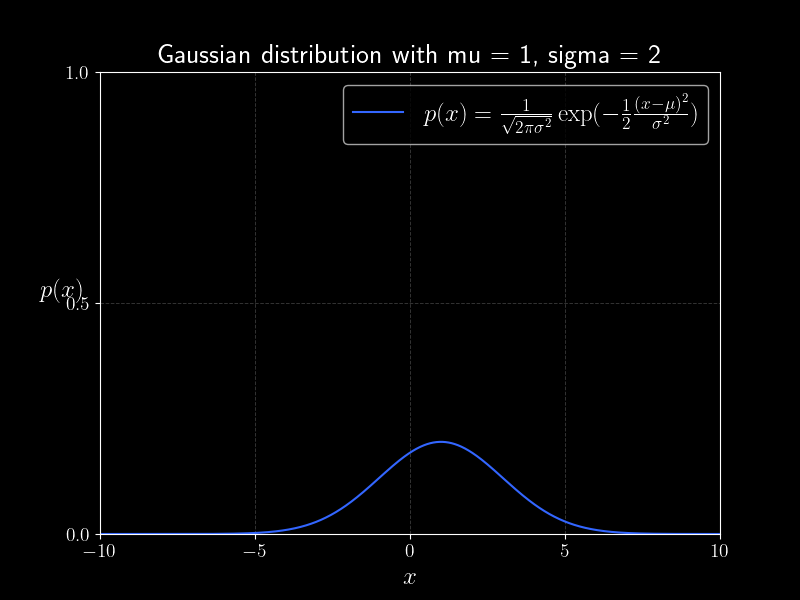

In [11]:
#create n numbers between -5 and 5
X =np.linspace(min1,max1,n)
# change these values to see what happens
mu = 1
sigma = 2
Y = gaussian_pdf(X, mu, sigma)

#plot show is supressed and instead we load the generated image
plot_gaussian(X,Y, mu, sigma,"ex0/1.png")
display(IMG(filename="ex0/1.png"))


In [12]:
def generate_gaussian_1d_scatter(X, gen_n, mu, sigma):
    pdf_values = gaussian_pdf(X, mu, sigma)
    # because values are discrete (n points) we need to normalize
    pdf_values /= pdf_values.sum()
    chosen_x_values = np.random.choice(X, size=gen_n, p=pdf_values)
    return chosen_x_values

# fancy
def plot_gaussian_1d_scatter(x_vals, gen_n, folder):
    plt.figure(figsize=(8, 2))
    plt.scatter(x_vals, np.zeros(gen_n), color = nice_blue)
    plt.title(f"Generated 1D datapoints from distribution (mu={mu}, sigma={sigma})",fontsize = 20)
    plt.xticks([-10,-5,0,5,10, mu], fontsize = 14)
    plt.yticks([-0.5,0.5], fontsize = 14)
    plt.xlabel("x values")
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.yticks([]) 

    plt.savefig(folder,pad_inches = 0.2)
    #plt.show()

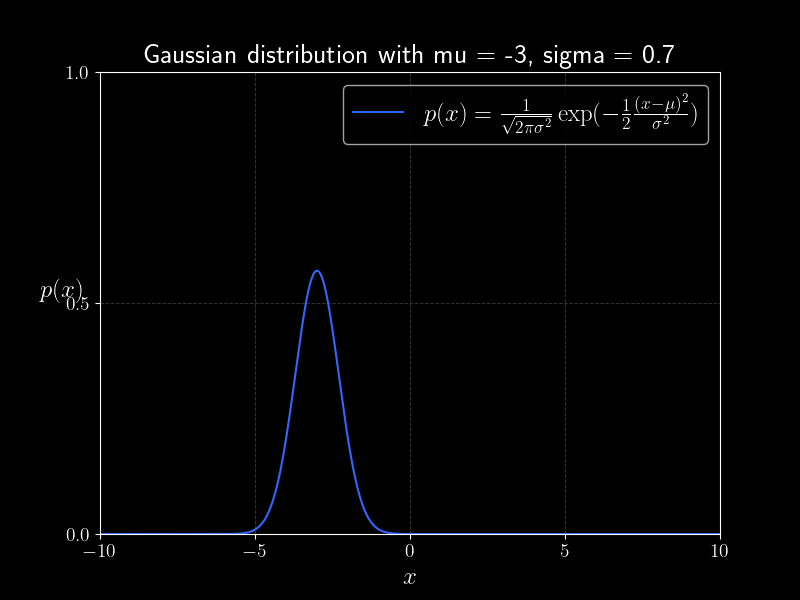

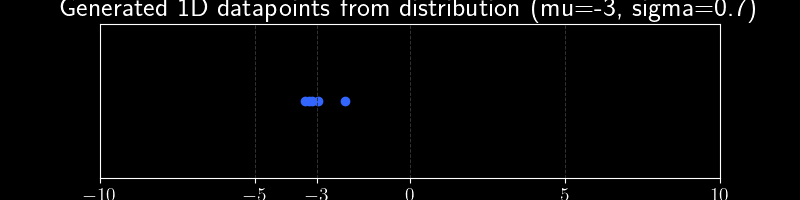

In [13]:
# change these numbers to see what is changing
X = np.linspace(min1,max1,1000) #input values

mu = -3
sigma = 0.7
Y = gaussian_pdf(X, mu, sigma) # distribution

gen_n  = 5 # number of points to be generated 
x_vals = generate_gaussian_1d_scatter(X,gen_n, mu, sigma) # data generated based on the distribution

plot_gaussian(X,Y, mu, sigma, "ex0/1.png")
plot_gaussian_1d_scatter(x_vals, gen_n, "ex0/2.png")

display(IMG(filename="ex0/1.png"))
display(IMG(filename="ex0/2.png"))



### Coariance, Covariance matrix  of Datapoints in R^2

Warning the data matricies have datapoints in R^2 and A is in R^nxd. (Because its a list of n data points and each data point is a list length d) 
This is not like in the lecture and it's common to see different definitions.

In [15]:
# number of elements
n_A = 5000

# scatter matrix
X_1 = 2
X_2 = 2
cov = 0
S_A = [[X_1, cov],
       [cov, X_2]]

mean_A = [0,0] 

A = np.random.multivariate_normal(mean_A, S_A, n_A)

print(f"A has {n_A} datapoints:\n",  A)
print(f"Shape A is {np.shape(A)}")


A has 5000 datapoints:
 [[ 2.68579398  1.84031232]
 [-0.5485516  -2.72329389]
 [ 1.75640963 -0.60154419]
 ...
 [ 0.53671874 -0.49673323]
 [ 0.06813766  0.2408611 ]
 [ 1.91421944  2.24441239]]
Shape A is (5000, 2)


Task 2

In [16]:
mean_A = [0,0] 
A = np.random.multivariate_normal(mean_A, S_A, n_A).T # here A has the same shape as defined in lecture and on sheets

print(f"Here shape A {np.shape(A)}")

#emperical covariance matrix for centered data
S_A_emp = 1/n_A * np.matmul(A, A.T)
print(f"\nMean {mean_A}\nemperical covariance matrix: \n {S_A_emp}\n\nactual covariance matrix: \n [{S_A[0]}\n {S_A[1]}] \n\nDifference\n {S_A_emp - S_A}")

Here shape A (2, 5000)

Mean [0, 0]
emperical covariance matrix: 
 [[1.9995511  0.01459941]
 [0.01459941 1.98939057]]

actual covariance matrix: 
 [[2, 0]
 [0, 2]] 

Difference
 [[-0.0004489   0.01459941]
 [ 0.01459941 -0.01060943]]


In [17]:
mean_A = [4,2] 
A = np.random.multivariate_normal(mean_A, S_A, n_A).T # here A has the same shape as defined in lecture and on sheets

print(f"Here shape A {np.shape(A)}")

#emperical covariance matrix for centered data
S_A_emp = 1/n_A * np.matmul(A, A.T)
print(f"\nMean {mean_A}\nemperical covariance matrix: \n {S_A_emp}\n\nactual covariance matrix: \n [{S_A[0]}\n {S_A[1]}] \n\nDifference\n {S_A_emp - S_A}")

Here shape A (2, 5000)

Mean [4, 2]
emperical covariance matrix: 
 [[17.80917024  7.90192801]
 [ 7.90192801  5.9621898 ]]

actual covariance matrix: 
 [[2, 0]
 [0, 2]] 

Difference
 [[15.80917024  7.90192801]
 [ 7.90192801  3.9621898 ]]


For the homework you will need to find a way to calculate the empirical covariance matrix for non centered data.

In [18]:
X = np.array([[-1,-1],[-1,0],[1,0],[1,1]]).T

print(f"Here shape X is {np.shape(X)}")
print(f"Mean datapoint of X is {np.mean (X,axis=1)} ")

S_X_emp = 1/4 * np.matmul(X,X.T)
print(f"emperical covariance matrix: \n {S_X_emp}\n\nactual covariance matrix: We dont know, but assume gaussian.")


Here shape X is (2, 4)
Mean datapoint of X is [0. 0.] 
emperical covariance matrix: 
 [[1.  0.5]
 [0.5 0.5]]

actual covariance matrix: We dont know, but assume gaussian.


In [ ]:
def scatter_plot_A(A,X_1,X_2,cov,folder):
    # get x1 and x2 values from A
    A_x1 = A[:,0]
    A_x2 = A[:,1]

    # Plot Data points from A and B
    plt.figure(figsize=(8, 6))

    plt.scatter(A_x1,A_x2, s = 60, color = (0.2,0.4,1),  label="Datapoint from class A")
    plt.style.use('dark_background') #dark mode
    fsize = 18
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x_1$", fontsize = 18, rotation = 0)
    plt.ylabel("$x_2$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title(f"$X_1$ = {X_1}, $X_2$ = {X_2}, Covariance($X_1,X_2$) = {cov}", fontsize = 20)
    plt.grid(color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7, zorder = 1)
    plt.savefig(folder)
 


### Task 1

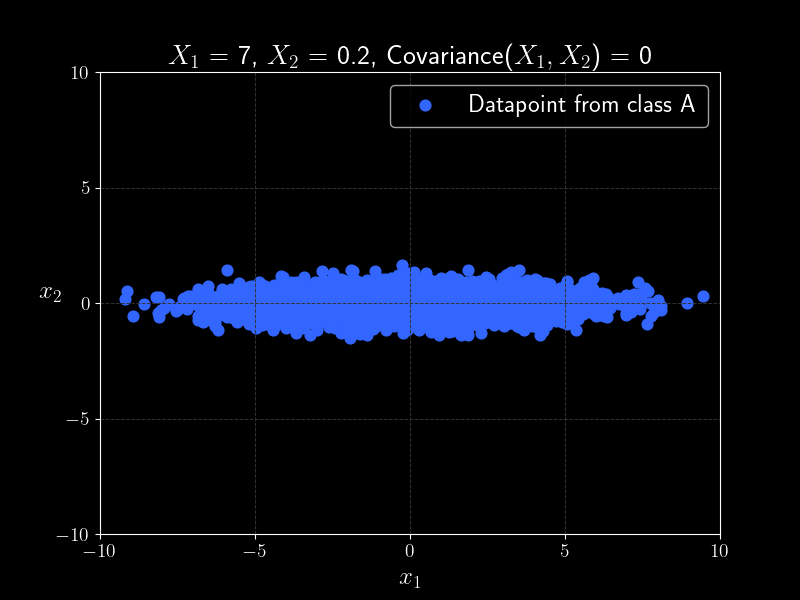

In [20]:
# number of elements
n_A = 5000

# scatter matrix
X_1 = 7 
X_2 = 0.2
cov = 0

S_A = [[X_1,cov],
       [cov,X_2]]

mean_A = [0,0] 
A = np.random.multivariate_normal(mean_A, S_A, n_A)

scatter_plot_A(A,X_1,X_2,cov,"scatter_A.png")
display(IMG(filename="scatter_A.png"))


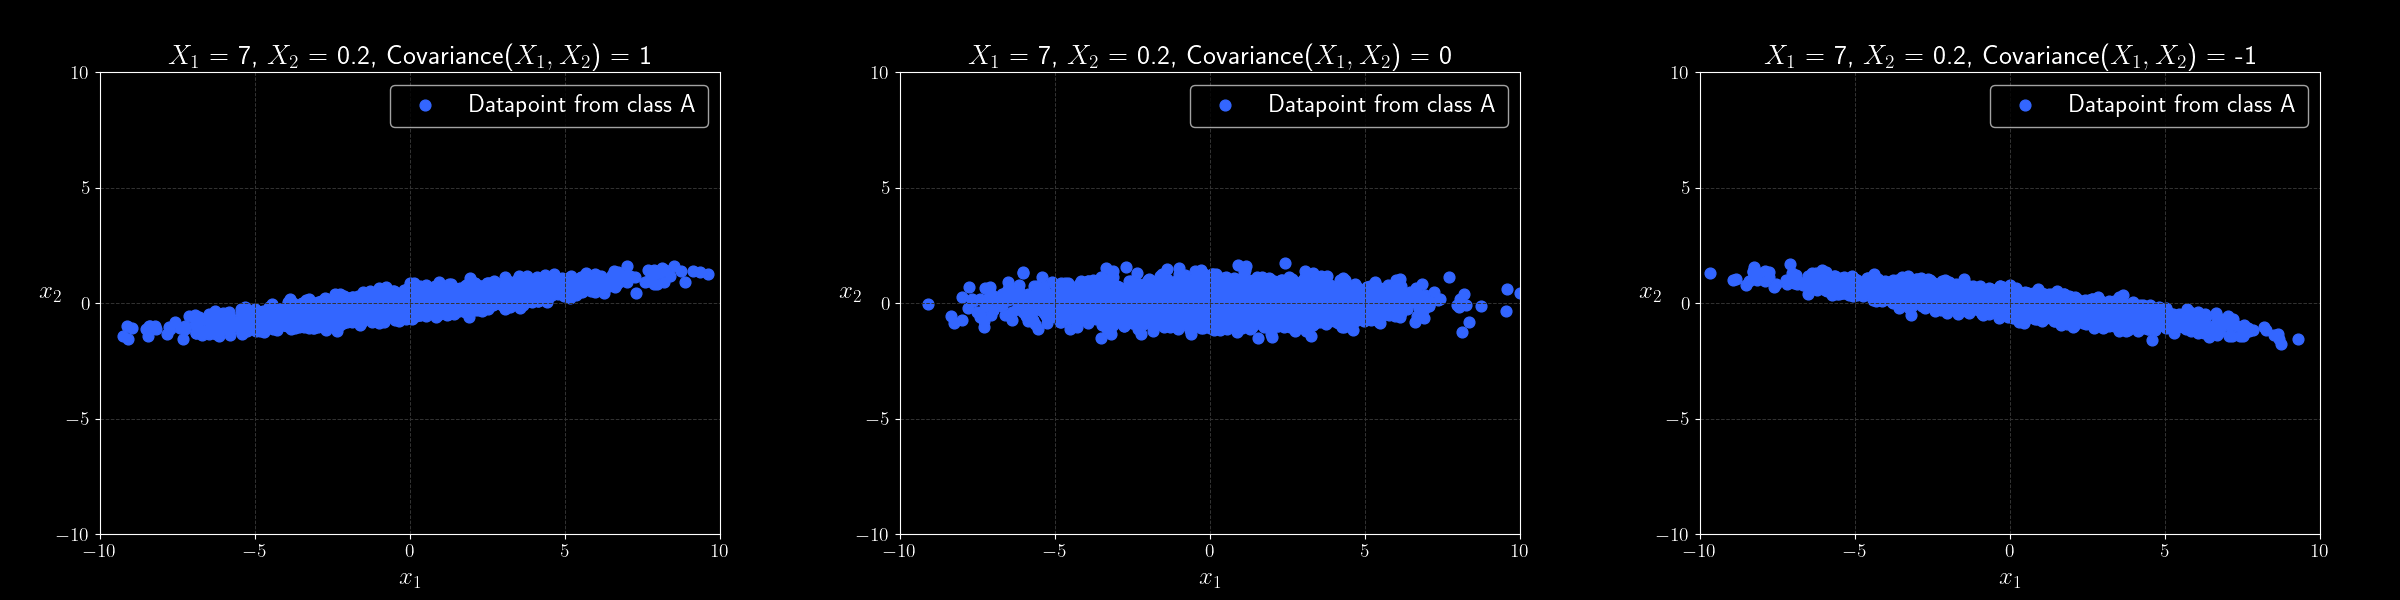

In [21]:
# number of elements
n_A = 5000

X_1 = 7
X_2 = 0.2

# change the numbers to see what happens
positive = 1 
#positive = 1.2 
zero = 0
negative = -1
#negative = -1.2

#for saving images (ignore i)
i=1 


for cov in [positive, zero, negative]:
    # scatter matrix
    S_A = [[X_1,cov],
          [cov,X_2]]

    mean_A = [0,0] 
    A = np.random.multivariate_normal(mean_A, S_A, n_A)

    i = i+1  
    scatter_plot_A(A,X_1,X_2,cov,f"ha01/scatter_A_{i}.png")
    
# plot show is supressed and instead we load a collage of the generated images
# 1 row, 3 columns, and we shrink the image by a factor of 1 
# (if shrinkage would be 2 then 100 pixel x 100 pixel -> 50 pixels x 50 pixels)
create_collage("ha01/", 1, 3, 1,"cov_differences.png" )


Here we can see that covariance and correlation are different!

Why does it not turn more? The variance of x_2 has to stay the same!

Let's look at the historgramm of the data in x_1 and x_2 dimensions.

In [22]:
def plot_histo_of_scatter(A_x,ax,rand_var,folder):
    # histogram
    yl = 50
    bar_width = 0.5  # Set the width of each bar in the histogram

    plt.rc('text', usetex=True)
    plt.style.use('dark_background') #dark mode
    plt.figure(figsize=(8, 6))

   
    plt.xlim(-10,10)
    plt.ylim(0,yl)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.title("Histogram of x1 values", fontsize=16)
    plt.xlabel(f"$x_{ax}$", fontsize = 18, rotation = 0)
    plt.ylabel("Frequency", fontsize=14)
    plt.tick_params(axis='both', labelsize=12)  # Set tick label size
    data_range = np.max(A_x) - np.min(A_x)
    n_bins = int(data_range / bar_width)
    plt.hist(A_x, bins=n_bins, color=(0.2,0.4,1), edgecolor='black')
    plt.title(f'Histogram of $x_{ax}$ values (X_{ax} follows variance {rand_var})', fontsize = 20)
    plt.grid( zorder = 0,color=(0.2,0.2,0.2), linestyle='--', linewidth=0.7)

    plt.savefig(folder)
 

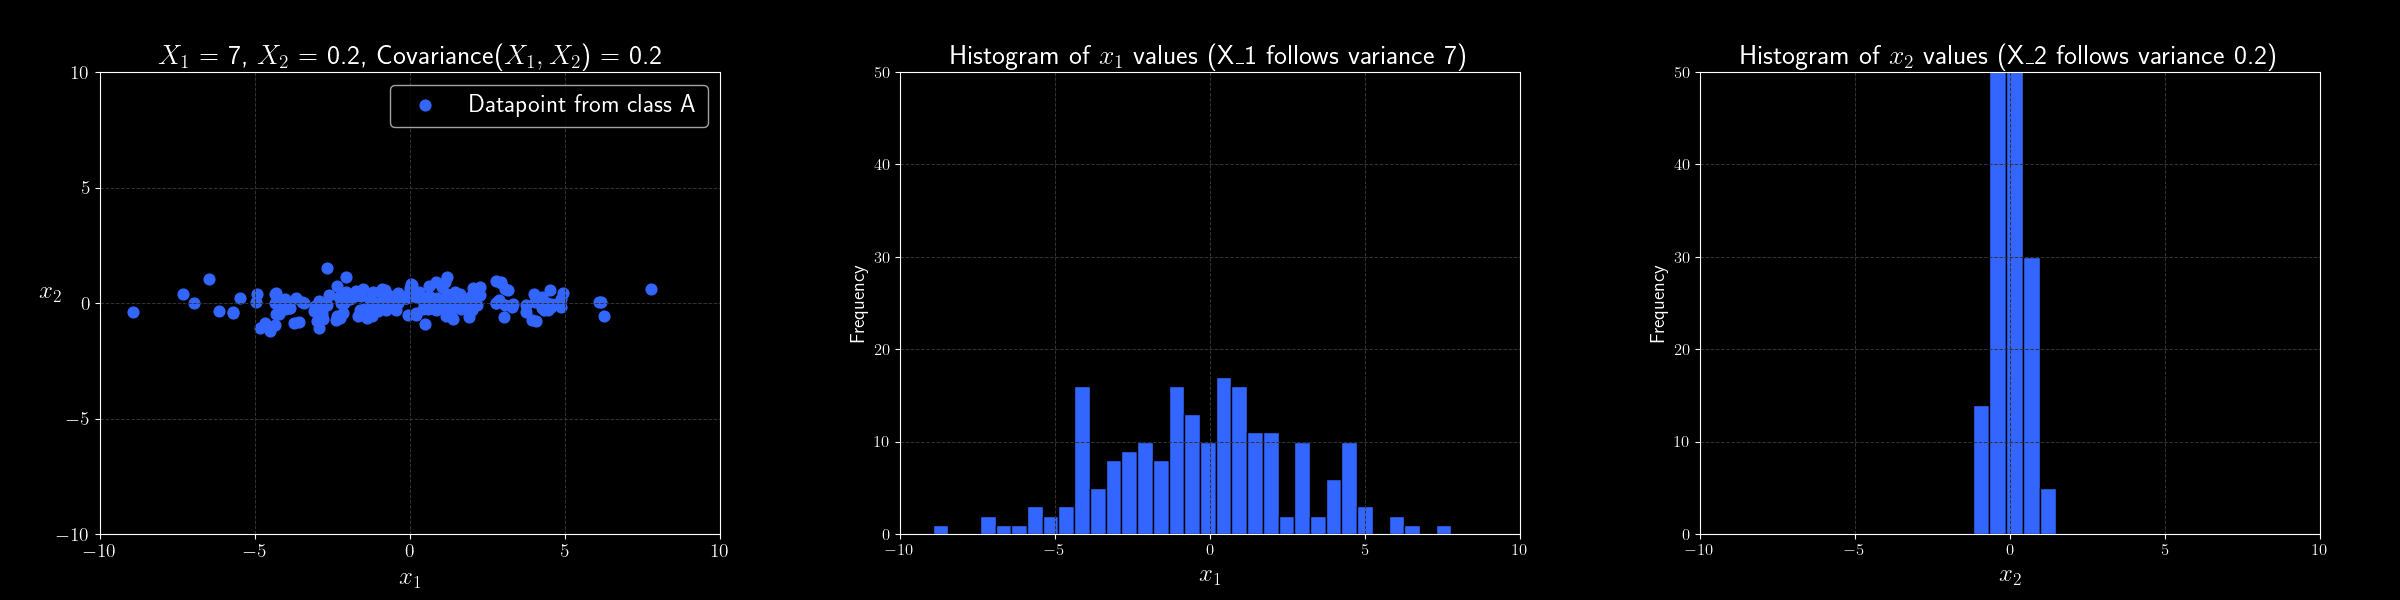

In [23]:
# generate data
n_A = 200

X_1 = 7 # 1
X_2 = 0.2 # 1
cov = 0.2

mean_A = [0,0] 

S_A = [[X_1,cov], 
       [cov,X_2]] 

A = np.random.multivariate_normal(mean_A, S_A, n_A)

A_x1 = A[:,0]
A_x2 = A[:,1]

# show data
scatter_plot_A(A,X_1,X_2,cov,"ex1/1_scatter_A.png")

plot_histo_of_scatter(A_x1,"1",X_1,"ex1/2_histo_A_x1.png")
plot_histo_of_scatter(A_x2,"2",X_2,"ex1/3_histo_A_x2.png")

create_collage("ex1/", 1, 3, 1,"all.png")

In [81]:
# Note that 
#   looking at the histogram of the x_1 values is the same as looking at the   #   histogram of data projected onto w, with w being [1,0]^T (w_1 = 1, w_2 = 0)

#   looking at the histogram of the x_2 values is the same as looking at the   #   histogram of data projected onto w, with w being [0,1]^T (w_1 = 0, w_2 = 1)

# if this is not clear please calculate some what happens if you do [1,0]^T x and [0,1]^T x. (x being in R^2, x = [x_1, x_2]^T) 

Now that we hopefully understand variance and covariance, let's look at how our linear classifiers are doing on some correlated data.

first lets plot two data sets

Task 4 3) Example

In [24]:
# A is -, B is +

# number of elements equal
n_A = 5000
n_B = 5000

# scatter matrix
S_A = [[1,-0.99],
      [-0.99,1]]

S_B =[[1,-0.99],
      [-0.99,1]]

# mean
mean_A = [0,1]
mean_B = [-2,0]

A = np.random.multivariate_normal(mean_A, S_A, n_A)
B = np.random.multivariate_normal(mean_B, S_B, n_B)

print(f"A has {n_A} datapoints:\n",  A)
print(f"B has {n_B} datapoints:\n",  B)

A has 5000 datapoints:
 [[ 0.07999103  0.98297055]
 [ 0.54850215  0.52851877]
 [ 0.88782484  0.1387508 ]
 ...
 [ 0.54325476  0.29595738]
 [-0.17132395  1.28708774]
 [ 0.50812079  0.53944413]]
B has 5000 datapoints:
 [[-2.03136414 -0.00422501]
 [-2.46982856  0.58676345]
 [-1.19046093 -0.70979539]
 ...
 [-2.38496458  0.5589627 ]
 [-2.57255887  0.83788143]
 [-0.51839204 -1.71928717]]


In [25]:
def plot_two_scatter(folder):
    # get x1 and x2 values from A and B
    A_x1 = A[:,0]
    A_x2 = A[:,1]
    B_x1 = B[:,0]
    B_x2 = B[:,1]
    plt.figure(figsize=(8, 6))
    # Plot Data points from A and B
    plt.style.use('dark_background') #dark mode
    fsize = 18
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.rc('text', usetex=True)
    plt.xlabel("$x_1$", fontsize = 18, rotation = 0)
    plt.ylabel("$x_2$", fontsize = 18, rotation = 0)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)
    plt.legend(loc= "upper right", fontsize = fsize)
    plt.title("Scatter plot of data points")

    # Plot Data points from A and B
    plt.scatter(A_x1,A_x2, s = 60, color = (0.2,0.4,1),  label="A")
    plt.scatter(B_x1,B_x2, s = 60, color = (0.9,0.7,0.2), label="B", marker = "*")

    #Ploz means of A and B
    plt.scatter(np.mean(A_x1), np.mean(A_x2), s = 30, color = 'black')
    plt.scatter(np.mean(B_x1), np.mean(B_x2), s = 30, color = 'black', marker = "*")
    plt.savefig(folder)

def plot_two_histo_x2(folder):
    # get x1 and x2 values from A and B
    A_x1 = A[:,0]
    A_x2 = A[:,1]
    B_x1 = B[:,0]
    B_x2 = B[:,1]

    plt.figure(figsize=(8, 6))
    # histogram
    plt.rc('text', usetex=True)
    plt.style.use('dark_background') #dark mode
    fsize = 18
    plt.xlim(-10,10)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.title("Histogram of x1 values", fontsize=16)
    plt.xlabel("$x_1$", fontsize = 18, rotation = 0)
    plt.ylabel("Frequency", fontsize=14)
    plt.tick_params(axis='both', labelsize=12)  # Set tick label size
    plt.hist(A_x2, bins=30, alpha=0.6,color=(0.2,0.4,1), edgecolor='black')
    plt.hist(B_x2, bins=30, alpha=0.6,color= (0.9,0.7,0.2), edgecolor='black')
    plt.title('Histogram of $x_1$ values')
    plt.savefig(folder)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


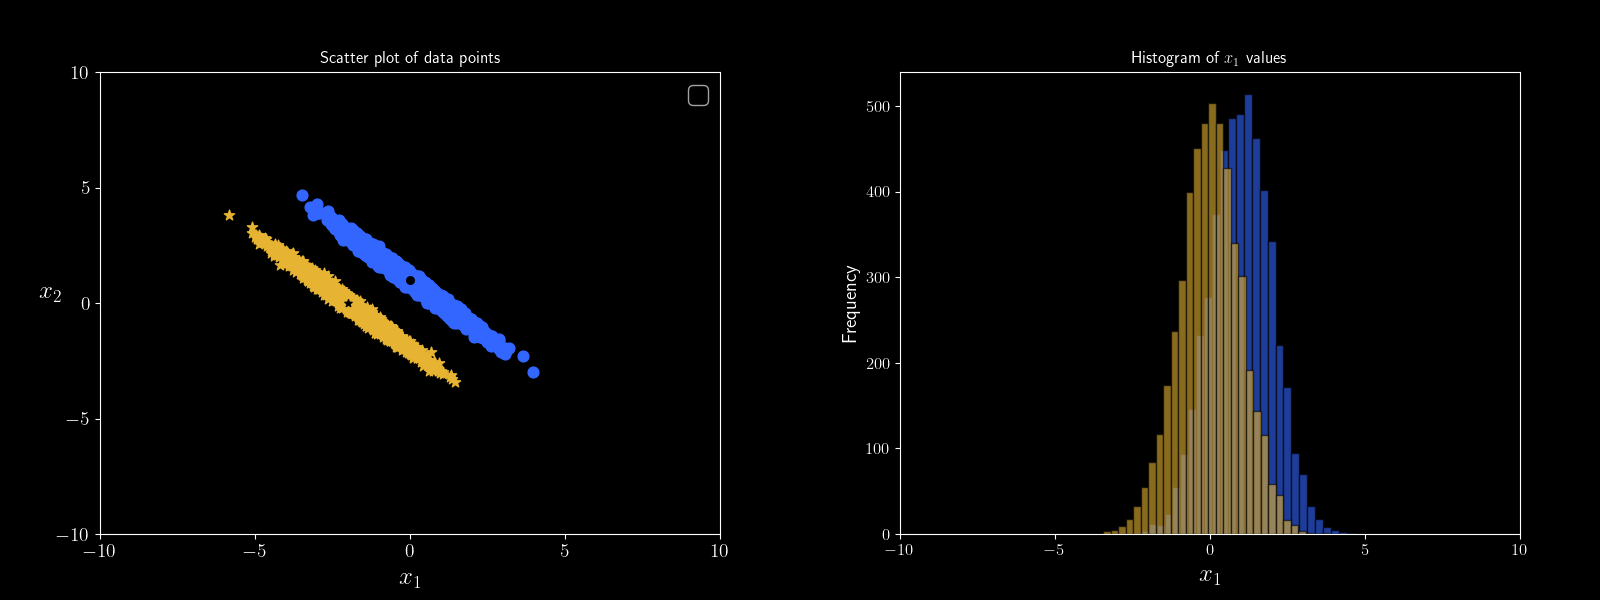

In [26]:
plot_two_scatter("ex2/1.png")
plot_two_histo_x2("ex2/2.png")

create_collage("ex2/", 1, 2, 1,"two_classes_with_histo.png")

With LDA we assume that each class is following a gaussian distribution and that each class has about the same variance, covariance in each dimension i.e that both classes have the same covariance matrix.

### Comparison of classification algorithms

For showing the difference between the classification algorithms, we load them from sklearn. 

https://scikit-learn.org/stable/supervised_learning.html

In [27]:
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from matplotlib.lines import Line2D

In [61]:
# This is a lot of code just for making the plots pretty

def plot_NCC(folder, A,B):
    # get x1 and x2 values from A and B
    A_x1 = A[:,0]
    A_x2 = A[:,1]
    B_x1 = B[:,0]
    B_x2 = B[:,1]
    fsize = 18
    plt.figure(figsize=(8, 6))
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)

    #--------------plot data ------------------------------------------
    plt.title("Nearest Centroid Classifier (NCC)", fontsize = fsize)
    plt.rc('text', usetex=True)
    plt.xlabel("$x_1$", fontsize = 18, rotation = 0)
    plt.ylabel("$x_2$", fontsize = 18, rotation = 0)
    plt.scatter(A_x1,A_x2, s = 60, color = nice_blue,  label="A")
    plt.scatter(np.mean(A_x1), np.mean(A_x2), s = 30, color = off_white)
    plt.scatter(B_x1,B_x2, s = 60, color = nice_orange, label="B", marker = "*")
    plt.scatter(np.mean(B_x1), np.mean(B_x2), s = 30, color = off_white, marker = "*")

    #------------------ plot results of the algorithms ---------------------
    ncc = NearestCentroid()
    X = np.vstack((A, B))
    print(np.shape(X))

    y = np.hstack((np.zeros(n_A), np.ones(n_A)))

    ncc.fit(X, y)
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.02), np.arange(-10, 10, 0.02))
    Z = ncc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors="white", levels=[0.5], linestyles=['dashed'], linewidths = 3)

    plt.legend(loc= "upper left", fontsize = fsize)
    plt.savefig(folder)

def plot_LDA(folder,A,B):
    # get x1 and x2 values from A and B
    A_x1 = A[:,0]
    A_x2 = A[:,1]
    B_x1 = B[:,0]
    B_x2 = B[:,1]
    fsize = 18
    plt.figure(figsize=(8, 6))
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)

    #--------------plot data ------------------------------------------
    plt.title("Linear Discriminant Analysis (LDA)", fontsize = fsize)
    plt.rc('text', usetex=True)
    plt.xlabel("$x_1$", fontsize = 18, rotation = 0)
    plt.ylabel("$x_2$", fontsize = 18, rotation = 0)
    plt.scatter(A_x1,A_x2, s = 60, color = nice_blue,  label="A")
    plt.scatter(np.mean(A_x1), np.mean(A_x2), s = 30, color = off_white)
    plt.scatter(B_x1,B_x2, s = 60, color = nice_orange, label="B", marker = "*")
    plt.scatter(np.mean(B_x1), np.mean(B_x2), s = 30, color = off_white, marker = "*")

    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n_A), np.ones(n_A)))

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.02), np.arange(-10, 10, 0.02))
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors="white", levels=[0.5], linestyles=['dashed'], linewidths = 3)

    #plt.legend(loc= "upper right", fontsize = fsize)
    plt.savefig(folder)

def plot_perceptron(folder, A,B, rand_init):
    # get x1 and x2 values from A and B
    A_x1 = A[:,0]
    A_x2 = A[:,1]
    B_x1 = B[:,0]
    B_x2 = B[:,1]
    fsize = 18
    
    plt.figure(figsize=(8, 6))
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xticks([-10,-5,0,5,10], fontsize = 14)
    plt.yticks([-10,-5,0,5,10], fontsize = 14)

    #--------------plot data ------------------------------------------
    plt.title("Perceptron (P)", fontsize = fsize)
    plt.rc('text', usetex=True)
    plt.xlabel("$x_1$", fontsize = 18, rotation = 0)
    plt.ylabel("$x_2$", fontsize = 18, rotation = 0)
    plt.scatter(A_x1,A_x2, s = 60, color = nice_blue,  label="A")
    plt.scatter(np.mean(A_x1), np.mean(A_x2), s = 30, color = off_white)
    plt.scatter(B_x1,B_x2, s = 60, color = nice_orange, label="B", marker = "*")
    plt.scatter(np.mean(B_x1), np.mean(B_x2), s = 30, color = off_white, marker = "*")

    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n_A), np.ones(n_A)))
    per = Perceptron(early_stopping=True, max_iter = 500, random_state=rand_init)
    per.fit(X, y)
    xx, yy = np.meshgrid(np.arange(-10, 10, 0.02), np.arange(-10, 10, 0.02))
    Z = per.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors="white", levels=[0.5], linestyles=['dashed'], linewidths = 3)

    #plt.legend(loc= "upper right", fontsize = fsize)
    plt.savefig(folder)

(10000, 2)


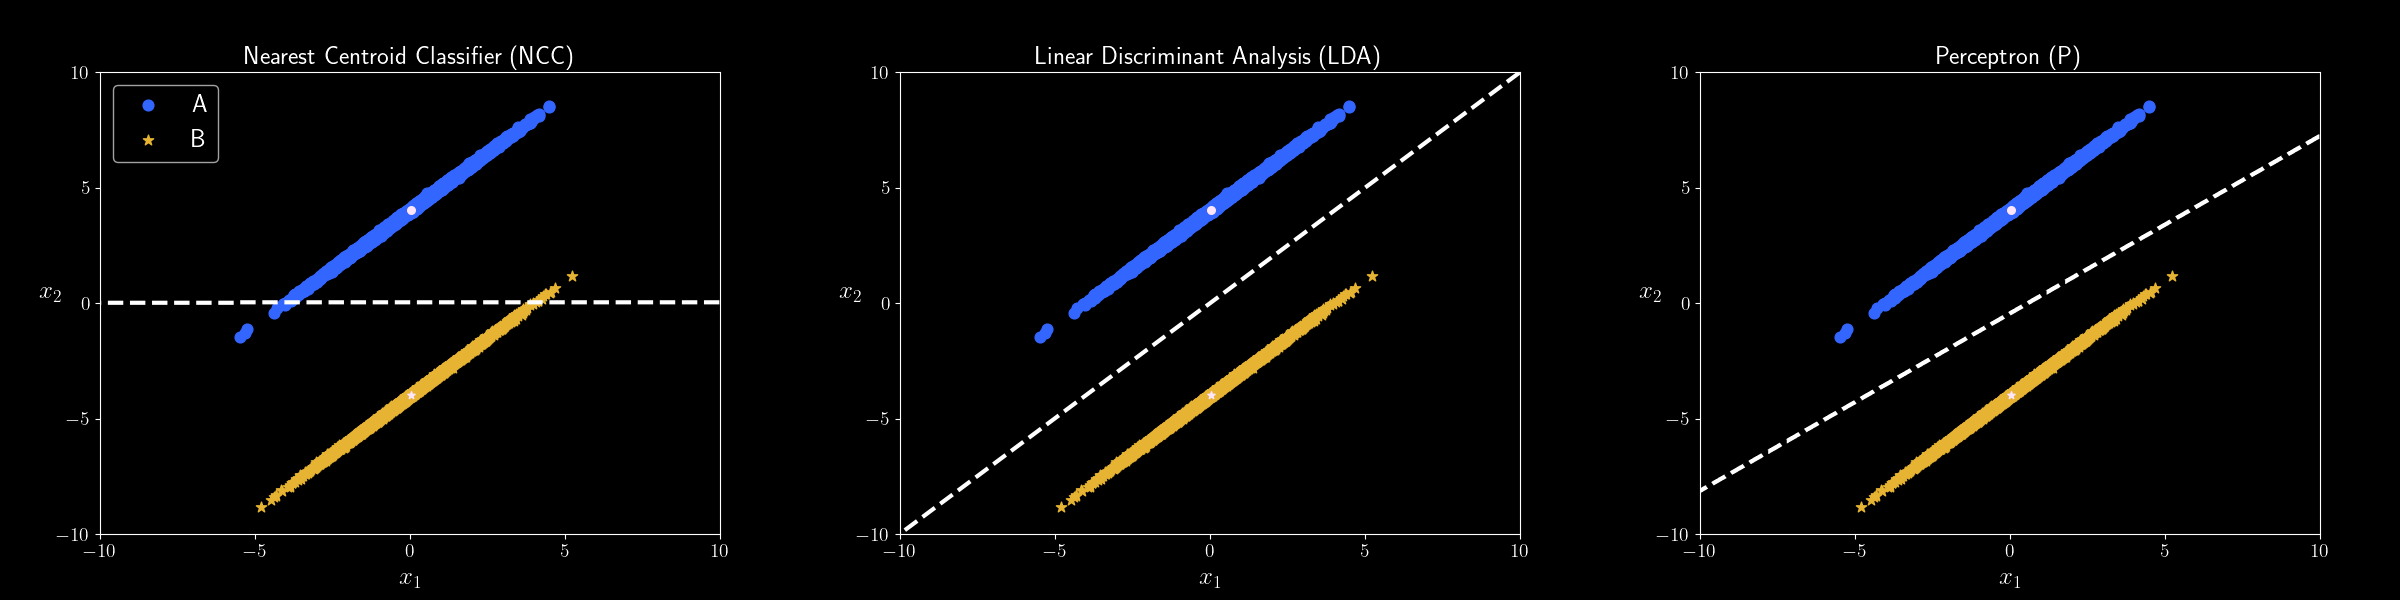

In [65]:
# scatter matrix
S_A = [[2,1.999],
      [1.999,2]]

S_B = [[2,1.999],
      [1.999,2]]

# generate datapoints, change these values!
# (mean, scatter matrix, number of points)
A = np.random.multivariate_normal([0,4], S_A, 5000)
B = np.random.multivariate_normal([0,-4], S_B, 5000)

plot_NCC("ex4/1_NCC.png",A,B)
plot_LDA("ex4/2_LDA.png",A,B)
plot_perceptron("ex4/3_P.png",A,B,0)

create_collage("ex4/", 1, 3, 1,"NCC_LDA_differences.png")

C:\Users\hanna\AppData\Local\Temp\ipykernel_13100\3784175672.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  collage = collage.resize((new_width, new_height), Image.ANTIALIAS)


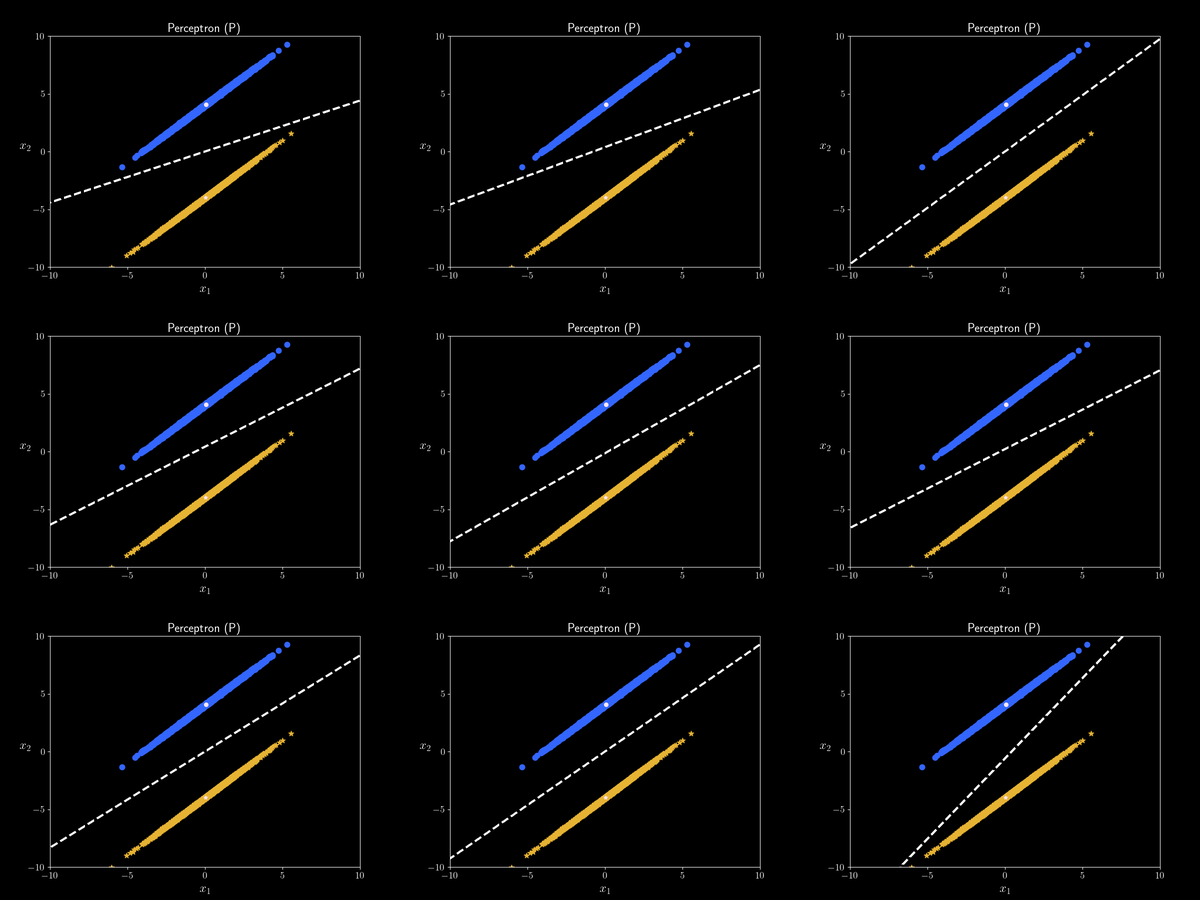

In [64]:
# scatter matrix
S_A = [[2,1.999],
      [1.999,2]]

S_B = [[2,1.999],
      [1.999,2]]

# generate datapoints, change these values!
# (mean, scatter matrix, number of points)
A = np.random.multivariate_normal([0,4], S_A, 5000)
B = np.random.multivariate_normal([0,-4], S_B, 5000)


for i in range(0,10):
    plot_perceptron(f"ex5/{i}_P.png",A,B,i)

create_collage("ex5/", 3, 3, 2,"Perceptron_random.png")